In [1]:
import tensorflow
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_data(num_samples_per_class):
    x1 = np.random.normal(size=(num_samples_per_class, 2))
    x2 = np.random.normal(size=(num_samples_per_class, 2)) + 2
    
    y1 = np.zeros(num_samples_per_class)
    y2 = np.ones(num_samples_per_class)
    return np.vstack((x1, x2)), np.hstack((y1, y2))

In [3]:
num_samples_per_class = 100
x, y = get_data(num_samples_per_class)

print(x.shape, y.shape)

(200, 2) (200,)


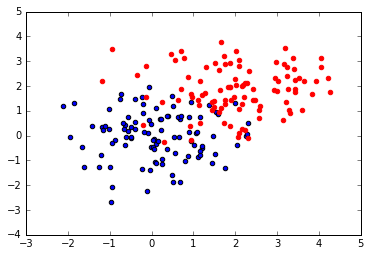

In [4]:
plt.figure()
plt.scatter(x[:100, 0], x[:100, 1])
plt.scatter(x[100:, 0], x[100:, 1], color='r')


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(16, input_dim=2),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid'),
])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 16)            48          dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 16)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 16)            272         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 16)            0           dense_2[0][0]                    
___________________________________________________________________________________________

In [6]:
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [7]:
X_train, Y_train = get_data(num_samples_per_class)

print(Y_train[0:10])
print(Y_train[100:110])

X_val, Y_val = get_data(num_samples_per_class)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [12]:
history = model.fit(X_train, Y_train, batch_size=16, nb_epoch=10, verbose=1)

Epoch 1/10
200/200 [==============================] - 0s - loss: 0.1822 - acc: 0.9300     
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.1809 - acc: 0.9300     
Epoch 3/10
200/200 [==============================] - 0s - loss: 0.1798 - acc: 0.9300     
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.1783 - acc: 0.9300     
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.1771 - acc: 0.9300     
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.1760 - acc: 0.9300     
Epoch 7/10
200/200 [==============================] - 0s - loss: 0.1749 - acc: 0.9300     
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.1739 - acc: 0.9300     
Epoch 9/10
200/200 [==============================] - 0s - loss: 0.1728 - acc: 0.9300     
Epoch 10/10
200/200 [==============================] - 0s - loss: 0.1715 - acc: 0.9300     


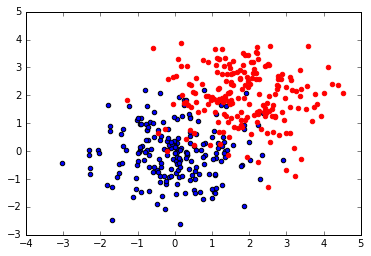

In [13]:
X_test, Y_test = get_data(200)

plt.figure()
plt.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
plt.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')

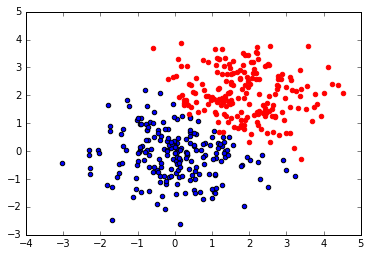

In [14]:
Y_predicted = np.int32(np.round(model.predict(X_test)[:, 0]))
plt.scatter(X_test[Y_predicted==0, 0], X_test[Y_predicted==0, 1])
plt.scatter(X_test[Y_predicted==1, 0], X_test[Y_predicted==1, 1], color='r')